# Relatório Intermediário

Gabriella Cukier

### Bibliotecas

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

### Funções utilizadas

In [2]:
def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run([f"./exe/{executavel}"], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return(proc.stdout, (end - start))

In [3]:
def gera_resultados(path, arquivos, executaveis):
    dic={}
    for executavel in executaveis:
        dic[executavel] = {
            "results": None,
            "times" : None
        }
        results=[]
        times=[]
        
        print(executavel)
        for arquivo_in in arquivos:

            desempenho = roda_com_entrada(executavel, f"{path}/{arquivo_in}")
            results.append(desempenho[0])
            times.append(desempenho[1])
            
            print(arquivo_in)

        dic[executavel]["results"] = results
        dic[executavel]["times"] = times
    return dic

In [4]:
def multi_df(dic):
    # https://www.geeksforgeeks.org/nested-dictionary-to-multiindex-dataframe/
    reformed_dict = {}
    for outerKey, innerDict in dic.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                           innerKey)] = values

    multiIndex_df = pd.DataFrame(reformed_dict)
    return multiIndex_df

## Resultados: Busca Exaustiva

#### Metodologia da comparação

Como a estratégia da busca exaustiva consiste em testar todas as possibilidades possíveis e assim achar uma solução ótima global, ela tende a ser mais compuacionalmente custosa. Desta forma, para fins de teste de desempenho, foi utilizado um intervalo com valores mais baixos referentes ao tamanho da sequência.

Para comparar os desempenhos entre as implementações descritas anteriormente, foram criadas 10 entradas diferentes, com o valor inicial do tamanho da sequência começando em 1 e aumentando de 10 em 10.

Os respectivos resultados de cada programa foram salvos em um dataframe, assim como os tempos de execução correspondentes. Por fim, foram elaborados gráficos comparativos e seus resultados analisados

##### Rodando os executáveis com cada arquivo de entrada

In [40]:
executaveis = ["busca_exaustiva_smith_waterman", "exaustiva-paralela", "exaustiva-paralela-reduce"]
arquivos=[]
for i in range(5):
    arquivos.append(f"dna{i}.seq")

##### Criando um Dataframe

In [41]:
dic_all = gera_resultados("in_exaustiva", arquivos, executaveis)

busca_exaustiva_smith_waterman
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
exaustiva-paralela
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
exaustiva-paralela-reduce
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq


In [42]:
df_all = pd.DataFrame(dic_all)
df_all

,busca_exaustiva_smith_waterman,exaustiva-paralela,exaustiva-paralela-reduce
results,"[0, 6, 13, 18, 28]","[0, 6, 13, 18, 28]","[0, 6, 13, 18, 28]"
times,"[0.015383303999442433, 0.011296929999843996, 0...","[0.009997873999964213, 0.009151273999123077, 0...","[0.02188908399966749, 0.029885601000387396, 0...."


In [43]:
multiIndex_df_all = pd.DataFrame(multi_df(dic_all))
multiIndex_df_all

busca_exaustiva_smith_waterman           exaustiva-paralela            \
                         results     times            results     times   
0                              0  0.015383                  0  0.009998   
1                              6  0.011297                  6  0.009151   
2                             13  0.074603                 13  0.048508   
3                             18  0.486861                 18  0.293612   
4                             28  2.343491                 28  1.130543   

  exaustiva-paralela-reduce            
                    results     times  
0                         0  0.021889  
1                         6  0.029886  
2                        13  0.063061  
3                        18  0.338354  
4                        28  1.270393

--------

Text(0.5, 1.0, 'Gráfico do tempo em função do tamanho da sequência\n')

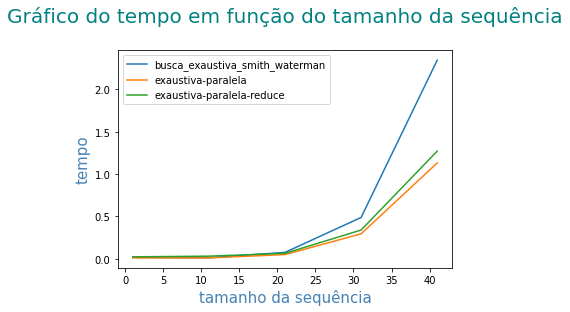

In [44]:
valores=[1]
for i in range (1,5):
    valores.append(valores[i-1]+10)

for exe in df_all.columns.values.tolist():
    plt.plot(valores,multiIndex_df_all[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("tempo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do tempo em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

Text(0.5, 1.0, 'Gráfico do valor máximo encontrado em função do tamanho da sequência\n')

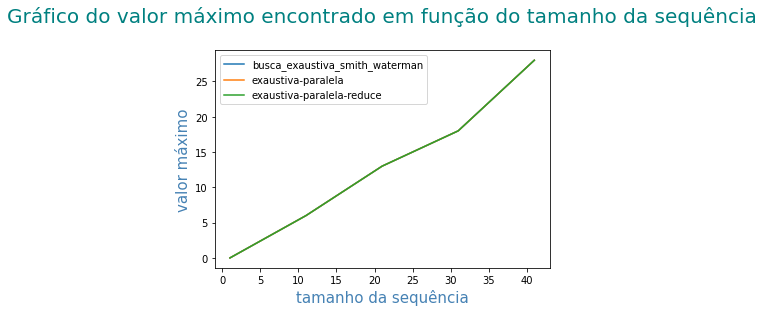

In [45]:
for exe in df_all.columns.values.tolist():
    plt.plot(valores,multiIndex_df_all[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("valor máximo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do valor máximo encontrado em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

In [ ]:
executaveis = ["busca_exaustiva_smith_waterman", "exaustiva-paralela", "exaustiva-paralela-reduce"]
arquivos=[]
for i in range(10):
    arquivos.append(f"dna{i}.seq")
    
dic_all10 = gera_resultados("in_exaustiva", arquivos, executaveis)

busca_exaustiva_smith_waterman
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq


In [11]:
df_all10 = pd.DataFrame(dic_all10)
df_all10

,busca_exaustiva_smith_waterman,exaustiva-paralela,exaustiva-paralela-reduce
results,"[0, 6, 13, 18, 28, 27, 35, 43, 42, 56]","[0, 6, 13, 18, 28, 27, 35, , , ]","[0, 4, 7, 2, 17, 20, 28, 34, 34, 49]"
times,"[0.006758605999948486, 0.008507329999929425, 0...","[0.006094597000128488, 0.008382733999951597, 0...","[0.018712769999865486, 0.011590485999931843, 0..."


In [12]:
multiIndex_df_all10_all10 = pd.DataFrame(multi_df(dic_all10))
multiIndex_df_all10

busca_exaustiva_smith_waterman             exaustiva-paralela             \
                         results       times            results      times   
0                              0    0.006759                  0   0.006095   
1                              6    0.008507                  6   0.008383   
2                             13    0.070113                 13   0.046071   
3                             18    0.491259                 18   0.267750   
4                             28    2.317775                 28   1.189879   
5                             27    7.920997                 27   4.680076   
6                             35   22.295591                 35  11.294452   
7                             43   54.090836                     14.832023   
8                             42  121.747406                      7.092539   
9                             56  245.927168                      5.882218   

  exaustiva-paralela-reduce              
                    results       times  
0                         0    0.018713  
1                         4    0.011590  
2                         7    0.076375  
3                         2    0.480176  
4                        17    2.231995  
5                        20    6.037426  
6                        28   17.181511  
7                        34   37.361578  
8                        34   80.600000  
9                        49  159.593130

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

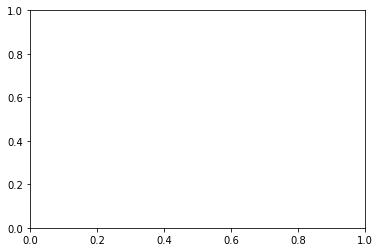

In [28]:
valores=[1]
for i in range (1,10):
    valores.append(valores[i-1]+10)

for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("tempo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do tempo em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

In [ ]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("valor máximo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do valor máximo encontrado em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

--------

In [13]:
executaveis = ["exaustiva-paralela-reduce"]
arquivos=[]
for i in range(20):
    arquivos.append(f"dna{i}.seq")
    
dic = gera_resultados("in_exaustiva_maior", arquivos, executaveis)

exaustiva-paralela-reduce
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
dna10.seq
dna11.seq
dna12.seq
dna13.seq
dna14.seq
dna15.seq
dna16.seq
dna17.seq
dna18.seq
dna19.seq


In [15]:
df = pd.DataFrame(dic)
df

,exaustiva-paralela-reduce
results,"[3, 4, 2, 14, 11, 20, 11, 17, 15, 22, 16, 26, ..."
times,"[0.013041952999628847, 0.007993674999852374, 0..."


In [16]:
multiIndex_df = pd.DataFrame(multi_df(dic))
multiIndex_df

exaustiva-paralela-reduce            
                     results       times
0                          3    0.013042
1                          4    0.007994
2                          2    0.018617
3                         14    0.049660
4                         11    0.142966
5                         20    0.358843
6                         11    0.825071
7                         17    1.713181
8                         15    3.127525
9                         22    5.213945
10                        16    9.570199
11                        26   14.429976
12                        31   23.100726
13                        33   34.814206
14                        28   51.595547
15                        30   74.292429
16                        37  106.867615
17                        41  148.229454
18                        42  205.466989
19                        44  231.519476

##### Gráfico da comparação de tempo

Text(0.5, 1.0, 'Gráfico do tempo em função do tamanho da sequência\n')

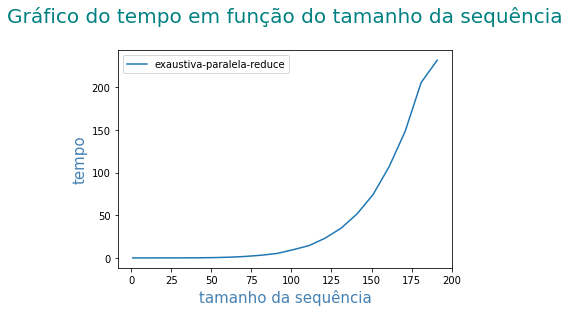

In [19]:
valores=[1]
for i in range (1,20):
    valores.append(valores[i-1]+10)

for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("tempo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do tempo em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

##### Gráfico da comparação de valores

Text(0.5, 1.0, 'Gráfico do valor máximo encontrado em função do tamanho da sequência\n')

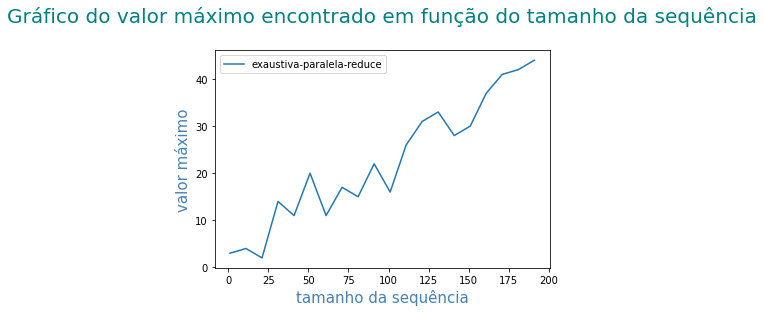

In [20]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("valor máximo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do valor máximo encontrado em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

### Análise e conclusões